In [272]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.pipeline import Pipeline
# Import necessary libraries
import re
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import string
from nltk.corpus import stopwords
nltk.download('punkt')
nltk.download('stopwords')
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer


stop_words = set(stopwords.words('english'))


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\cragh\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\cragh\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [230]:
print(stop_words)

{'some', 'does', 'if', 'has', 'isn', 'i', 'she', 'should', 'mustn', 'them', "that'll", 'below', 'those', 'in', 'whom', 'with', 'her', 'out', 'my', "wasn't", 'did', 'having', 'ma', 'him', "hadn't", 'yours', 'on', 'against', 'itself', 'were', 'they', 'are', 'each', 'not', 'to', 'will', 'your', 'don', 'who', 'why', 'ain', 'about', 'by', 'it', 'during', "wouldn't", 'own', 'how', 'for', 'down', 'had', 'until', "shouldn't", "mustn't", 'be', "needn't", 'only', 'which', "you've", 'couldn', 'we', 'doing', 'its', 'our', 'these', 'same', 'yourselves', "weren't", 'when', 'above', "you're", 'any', 'd', 'you', "didn't", 'such', 'and', 'very', 'their', 'have', 'both', 'now', 'was', 'mightn', 'here', 'again', 've', 'haven', 'at', 'because', "isn't", 'that', "hasn't", 'this', 'nor', 'theirs', "shan't", "you'd", 'needn', 'further', 'all', 'most', 'what', 's', 'his', 'shan', 'aren', 'from', 'am', "aren't", 'themselves', 'between', 'where', 'before', 'the', 'few', 'me', 'as', 'there', "doesn't", 'weren', 

## 1. Understanding the Data

In [231]:
# Load datasets
train_df = pd.read_csv('final_dataset_train.csv')
test_neg_df = pd.read_csv('test_neg.csv')
test_pos_df = pd.read_csv('test_pos.csv')

# Merge test datasets
test_df = pd.concat([test_neg_df, test_pos_df], ignore_index=True)


In [232]:
train_df

,movie_id,movie_rating,review,label
0,tt0064354,3,Story of a man who has unnatural feelings for ...,bad
1,tt0100680,1,Robert DeNiro plays the most unbelievably inte...,bad
2,tt0100680,1,"I saw the capsule comment said ""great acting.""...",bad
3,tt0100680,4,If I had not read Pat Barker's 'Union Street' ...,bad
4,tt0047200,4,This fanciful horror flick has Vincent Price p...,bad
...,...,...,...,...
24995,tt0433360,7,What's Good About It: Some inventive and genui...,good
24996,tt0433360,8,For years we've been watching every horror fil...,good
24997,tt0324532,10,If you haven't already seen this movie of Mary...,good
24998,tt0324532,10,this movie is the best movie ever it has a lot...,good


In [233]:
#Encode the table
label = {'bad':0, 'good':1}
train_df['label'] = train_df['label'].map(label)

In [234]:
test_df

,review,label
0,Once again Mr. Costner has dragged out a movie...,0
1,This is an example of why the majority of acti...,0
2,"First of all I hate those moronic rappers, who...",0
3,Not even the Beatles could write songs everyon...,0
4,Brass pictures (movies is not a fitting word f...,0
...,...,...
24995,I was extraordinarily impressed by this film. ...,1
24996,"Although I'm not a golf fan, I attended a snea...",1
24997,"From the start of ""The Edge Of Love"", the view...",1
24998,"This movie, with all its complexity and subtle...",1


In [235]:
train_df.info()
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   movie_id      25000 non-null  object
 1   movie_rating  25000 non-null  int64 
 2   review        25000 non-null  object
 3   label         25000 non-null  int64 
dtypes: int64(2), object(2)
memory usage: 781.4+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   review  25000 non-null  object
 1   label   25000 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 390.8+ KB


In [236]:
train_df.describe()

,movie_rating,label
count,25000.000000,25000.00000
mean,5.477720,0.50000
std,3.466477,0.50001
min,1.000000,0.00000
25%,2.000000,0.00000
50%,5.500000,0.50000
75%,9.000000,1.00000
max,10.000000,1.00000


In [237]:
# Checking for null values on the train dataset

train_df.isnull().sum()


movie_id        0
movie_rating    0
review          0
label           0
dtype: int64

In [238]:
# Checking for null values on the test dataset
test_df.isnull().sum()

review    0
label     0
dtype: int64

## 2.Explonatory Data Analysis(EDA) & Pre-processing

In [239]:
def preprocess_text(text):
    text = text.lower() # converting to lowercase

    # removing short form: 
    
    text=re.sub("isn't",'is not',text)
    text=re.sub("he's",'he is',text)
    text=re.sub("wasn't",'was not',text)
    text=re.sub("there's",'there is',text)
    text=re.sub("couldn't",'could not',text)
    text=re.sub("won't",'will not',text)
    text=re.sub("they're",'they are',text)
    text=re.sub("she's",'she is',text)
    text=re.sub("There's",'there is',text)
    text=re.sub("wouldn't",'would not',text)
    text=re.sub("haven't",'have not',text)
    text=re.sub("That's",'That is',text)
    text=re.sub("you've",'you have',text)
    text=re.sub("He's",'He is',text)
    text=re.sub("what's",'what is',text)
    text=re.sub("weren't",'were not',text)
    text=re.sub("we're",'we are',text)
    text=re.sub("hasn't",'has not',text)
    text=re.sub("you'd",'you would',text)
    text=re.sub("shouldn't",'should not',text)
    text=re.sub("let's",'let us',text)
    text=re.sub("they've",'they have',text)
    text=re.sub("You'll",'You will',text)
    text=re.sub("i'm",'i am',text)
    text=re.sub("we've",'we have',text)
    text=re.sub("it's",'it is',text)
    text=re.sub("don't",'do not',text)
    text=re.sub("that's",'that is',text)
    text=re.sub("I'm",'I am',text)
    text=re.sub("it's",'it is',text)
    text=re.sub("she's",'she is',text)
    text=re.sub("he's'",'he is',text)
    text=re.sub("I'm",'I am',text)
    text=re.sub("I'd",'I did',text)
    text=re.sub("he's",'he is',text)
    text=re.sub("there's",'there is',text)
    text=re.sub("didn't",'did not',text)
    
    text = re.sub('https?://\S+|www\.\S+', ' ', text) # removing URL links
    text = re.sub(r"\b\d+\b", " ", text) # removing number 
    text = re.sub('<.*?>+', ' ', text) # removing special characters, 
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text) # punctuations
    text = re.sub('\n', ' ', text)
    text = re.sub('[’“”…]', ' ', text)
    
    return text

In [240]:
# Download the punkt tokenizer for sentence splitting
nltk.download('punkt')

# Download the stopwords dataset
nltk.download('stopwords')

# Download the wordnet resource
nltk.download('wordnet')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\cragh\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\cragh\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\cragh\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [241]:
# Use the created function to apply preprocessing techniques on the reviews
train_df['review'] = train_df['review'].apply(preprocess_text)

In [242]:
train_df

,movie_id,movie_rating,review,label
0,tt0064354,3,story of a man who has unnatural feelings for ...,0
1,tt0100680,1,robert deniro plays the most unbelievably inte...,0
2,tt0100680,1,i saw the capsule comment said great acting in...,0
3,tt0100680,4,if i had not read pat barkers union street bef...,0
4,tt0047200,4,this fanciful horror flick has vincent price p...,0
...,...,...,...,...
24995,tt0433360,7,what is good about it some inventive and genui...,1
24996,tt0433360,8,for years we have been watching every horror f...,1
24997,tt0324532,10,if you have not already seen this movie of mar...,1
24998,tt0324532,10,this movie is the best movie ever it has a lot...,1


In [276]:
# Use the created function to apply preprocessing techniques on the reviews
test_df['review'] = test_df['review'].apply(preprocess_text)

In [277]:
test_df

,review,label
0,once again mr costner has dragged out a movie ...,0
1,this is an example of why the majority of acti...,0
2,first of all i hate those moronic rappers who ...,0
3,not even the beatles could write songs everyon...,0
4,brass pictures movies is not a fitting word fo...,0
...,...,...
24995,i was extraordinarily impressed by this film i...,1
24996,although i am not a golf fan i attended a snea...,1
24997,from the start of the edge of love the viewer ...,1
24998,this movie with all its complexity and subtlet...,1


In [243]:
train_df['no_sw'] = train_df['review'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop_words)]))

In [244]:
train_df

,movie_id,movie_rating,review,label,no_sw
0,tt0064354,3,story of a man who has unnatural feelings for ...,0,story man unnatural feelings pig starts openin...
1,tt0100680,1,robert deniro plays the most unbelievably inte...,0,robert deniro plays unbelievably intelligent i...
2,tt0100680,1,i saw the capsule comment said great acting in...,0,saw capsule comment said great acting opinion ...
3,tt0100680,4,if i had not read pat barkers union street bef...,0,read pat barkers union street seeing film woul...
4,tt0047200,4,this fanciful horror flick has vincent price p...,0,fanciful horror flick vincent price playing ma...
...,...,...,...,...,...
24995,tt0433360,7,what is good about it some inventive and genui...,1,good inventive genuinely creepy little effects...
24996,tt0433360,8,for years we have been watching every horror f...,1,years watching every horror film comes dull ho...
24997,tt0324532,10,if you have not already seen this movie of mar...,1,already seen movie marykate ashleys say waitin...
24998,tt0324532,10,this movie is the best movie ever it has a lot...,1,movie best movie ever lot live action great ev...


In [278]:
test_df['no_sw'] = test_df['review'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop_words)]))

In [279]:
test_df

,review,label,no_sw
0,once again mr costner has dragged out a movie ...,0,mr costner dragged movie far longer necessary ...
1,this is an example of why the majority of acti...,0,example majority action films generic boring r...
2,first of all i hate those moronic rappers who ...,0,first hate moronic rappers couldnt act gun pre...
3,not even the beatles could write songs everyon...,0,even beatles could write songs everyone liked ...
4,brass pictures movies is not a fitting word fo...,0,brass pictures movies fitting word really some...
...,...,...,...
24995,i was extraordinarily impressed by this film i...,1,extraordinarily impressed film one best sports...
24996,although i am not a golf fan i attended a snea...,1,although golf fan attended sneak preview movie...
24997,from the start of the edge of love the viewer ...,1,start edge love viewer transported striking wo...
24998,this movie with all its complexity and subtlet...,1,movie complexity subtlety makes one thoughtpro...


In [245]:
#sentiment count: 
train_df['label'].value_counts()

label
0    12500
1    12500
Name: count, dtype: int64

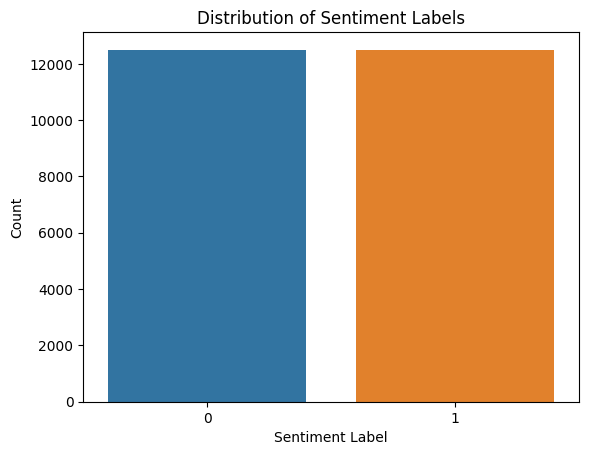

In [246]:
# Distribution of sentiment labels(0 or 1)
sns.countplot(data=train_df, x='label')
plt.title('Distribution of Sentiment Labels')
plt.xlabel('Sentiment Label')
plt.ylabel('Count')
plt.show()

We have 12,500 reviews for each positive (1) and negative (0).

<Axes: xlabel='movie_rating'>

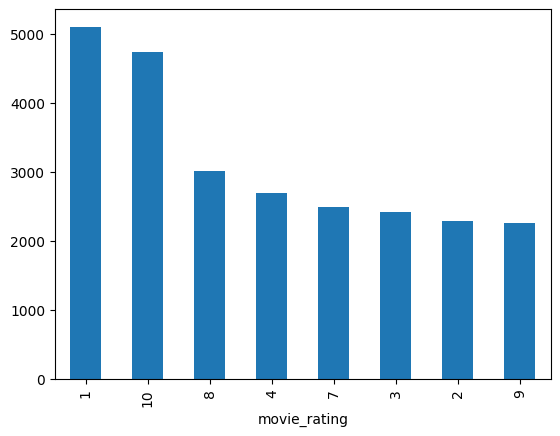

In [247]:
train_df['movie_rating'].value_counts().plot(kind = 'bar')

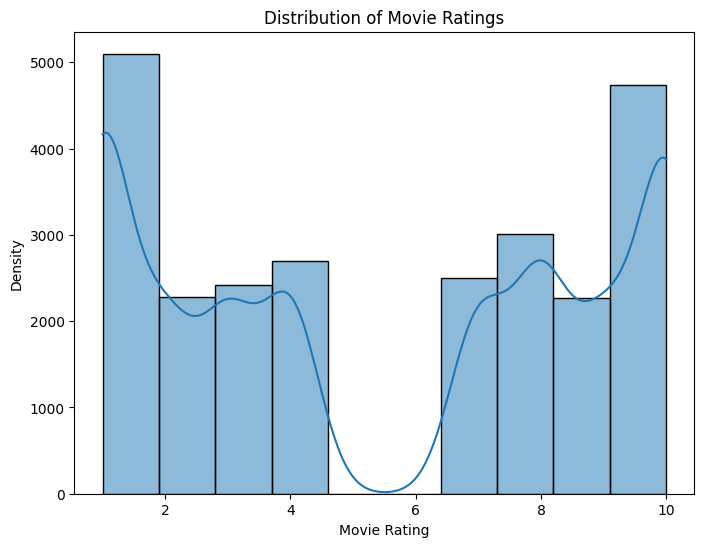

In [248]:
#Movie Rating Distribution

plt.figure(figsize=(8, 6))
sns.histplot(data=train_df, x='movie_rating', bins=10, kde=True)
plt.xlabel('Movie Rating')
plt.ylabel('Density')
plt.title('Distribution of Movie Ratings')
plt.show()

The graph shows the distribution of movie ratings, ranging from 0 to 10.
Around rating 0: Many movies received extremely low ratings.
Around rating 10: Many movies received exceptionally high ratings.
There is a noticeable dip in density around ratings 5-6, suggesting fewer movies received average scores.
Overall, movies tend to receive either very positive or very negative ratings, with fewer falling in the middle range.

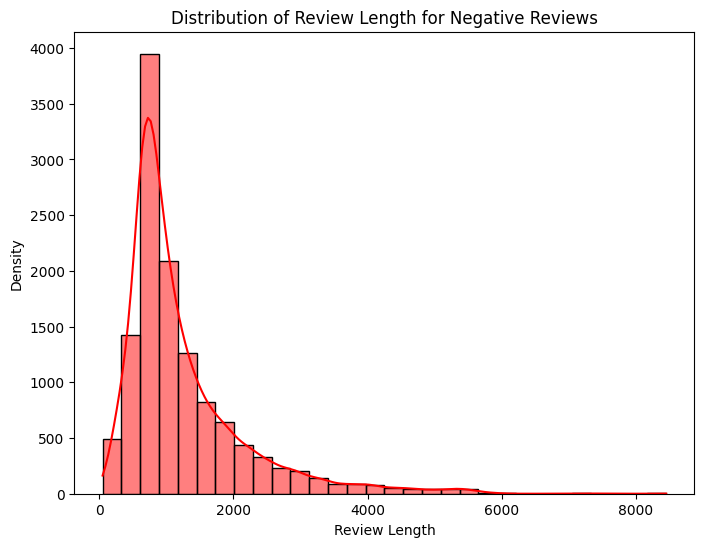

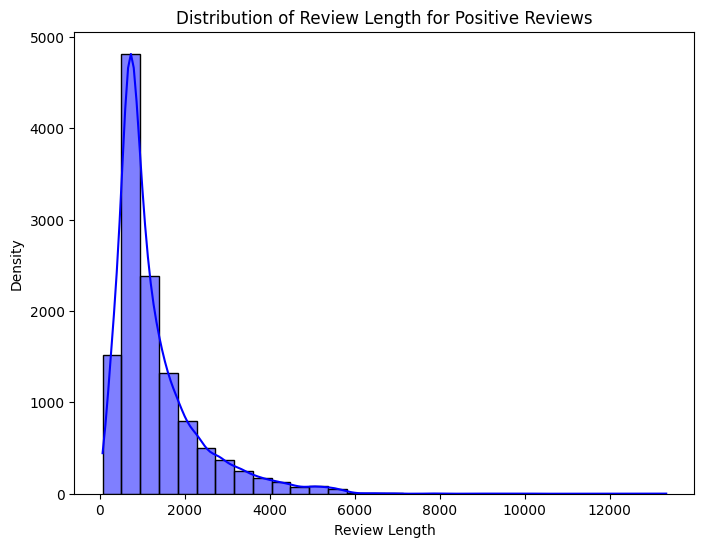

In [249]:
#Review Length
train_df['review_length'] = train_df['review'].apply(len)

# Histogram for Negative Reviews
plt.figure(figsize=(8, 6))
sns.histplot(data=train_df[train_df['label'] == 0], x='review_length', bins=30, kde=True, color='red')
plt.title('Distribution of Review Length for Negative Reviews')
plt.xlabel('Review Length')
plt.ylabel('Density')
plt.show()

# Histogram for Positive Reviews
plt.figure(figsize=(8, 6))
sns.histplot(data=train_df[train_df['label'] == 1], x='review_length', bins=30, kde=True, color='blue')
plt.title('Distribution of Review Length for Positive Reviews')
plt.xlabel('Review Length')
plt.ylabel('Density')
plt.show()


In [250]:
! pip install wordcloud

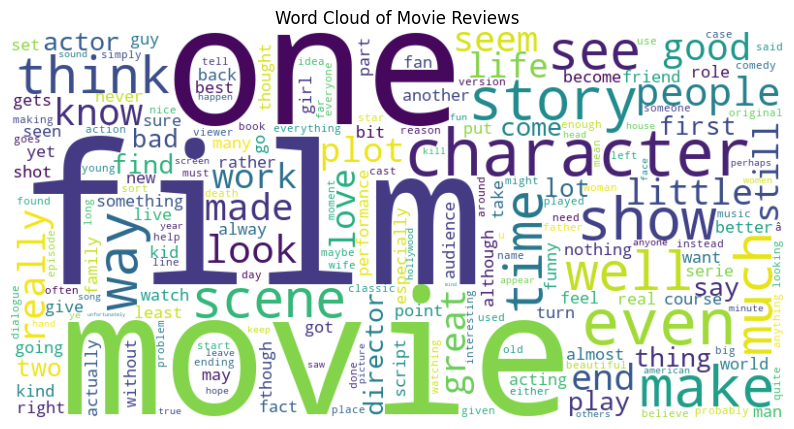

In [251]:
#Word Cloud for Reviews:
from wordcloud import WordCloud

# Combine all reviews into a single string
all_reviews = ' '.join(train_df['no_sw'])

# Generate word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_reviews)

plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Movie Reviews')
plt.show()

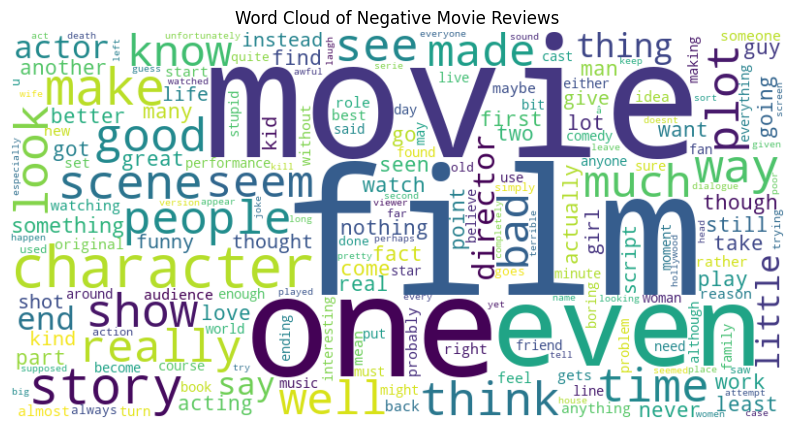

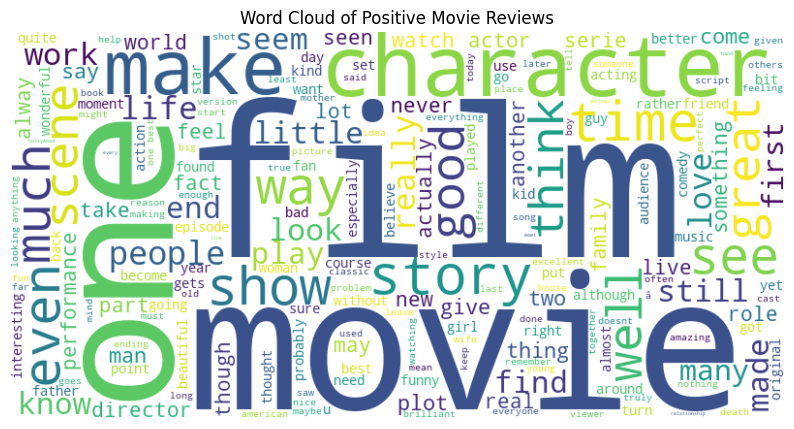

In [252]:
# Combine all negative reviews into a single string
negative_reviews = ' '.join(train_df[train_df['label'] == 0]['no_sw'])

# Generate word cloud for negative reviews
wordcloud_neg = WordCloud(width=800, height=400, background_color='white').generate(negative_reviews)

plt.figure(figsize=(10, 6))
plt.imshow(wordcloud_neg, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Negative Movie Reviews')
plt.show()

# Combine all positive reviews into a single string
positive_reviews = ' '.join(train_df[train_df['label'] == 1]['no_sw'])

# Generate word cloud for positive reviews
wordcloud_pos = WordCloud(width=800, height=400, background_color='white').generate(positive_reviews)

plt.figure(figsize=(10, 6))
plt.imshow(wordcloud_pos, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Positive Movie Reviews')
plt.show()


In [253]:
#Working with the most Frequent Words: 
from collections import Counter
cnt = Counter()
for text in train_df["no_sw"].values:
    for word in text.split():
        cnt[word] += 1
cnt.most_common(10)
temp = pd.DataFrame(cnt.most_common(10))
temp.columns=['word', 'count']
temp

,word,count
0,movie,42667
1,film,38255
2,one,25724
3,like,19678
4,good,14711
5,would,13600
6,even,12509
7,time,12133
8,really,11693
9,story,11673


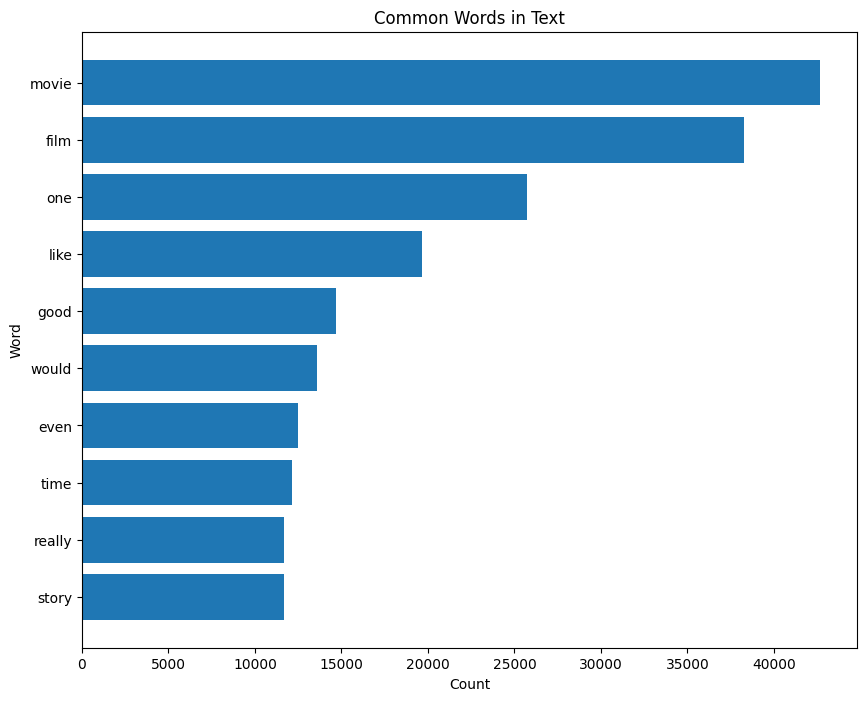

In [254]:
# Plotting with matplotlib (plt)
plt.figure(figsize=(10, 8))
plt.barh(temp['word'], temp['count'])
plt.xlabel('Count')
plt.ylabel('Word')
plt.title('Common Words in Text')
plt.gca().invert_yaxis()  # Invert y-axis to have the highest count at the top
plt.show()

In [255]:
# Remove the most frequent words:
FREQWORDS = set([w for (w, wc) in cnt.most_common(10)])
def remove_freqwords(text):
    """custom function to remove the frequent words"""
    return " ".join([word for word in str(text).split() if word not in FREQWORDS])
train_df["wo_stopfreq"] = train_df["no_sw"].apply(lambda text: remove_freqwords(text))
train_df.head()

,movie_id,movie_rating,review,label,no_sw,review_length,wo_stopfreq
0,tt0064354,3,story of a man who has unnatural feelings for ...,0,story man unnatural feelings pig starts openin...,648,man unnatural feelings pig starts opening scen...
1,tt0100680,1,robert deniro plays the most unbelievably inte...,0,robert deniro plays unbelievably intelligent i...,687,robert deniro plays unbelievably intelligent i...
2,tt0100680,1,i saw the capsule comment said great acting in...,0,saw capsule comment said great acting opinion ...,724,saw capsule comment said great acting opinion ...
3,tt0100680,4,if i had not read pat barkers union street bef...,0,read pat barkers union street seeing film woul...,1719,read pat barkers union street seeing liked unf...
4,tt0047200,4,this fanciful horror flick has vincent price p...,0,fanciful horror flick vincent price playing ma...,422,fanciful horror flick vincent price playing ma...


In [256]:
train_df['no_sw'].loc[5]

'basically skimmed movie enough catch watch plot tell truth kind boring spots make sense reason watched movie first place see chace crawford hot movie hair kind weird still hot however despite hot chace really make film guess plot bad really threw fact cuss like every sentence hard express anger without saying f word every timethe cussing annoying whole flashy camera shaking thing gave headache although plot ok found film bore dramatic cut scenes chace lol anyways worth renting unless diehard fan specific cast member like oh yeah cast hot girls hot chace best'

In [257]:
train_df['wo_stopfreq'].loc[5]

'basically skimmed enough catch watch plot tell truth kind boring spots make sense reason watched first place see chace crawford hot hair kind weird still hot however despite hot chace make guess plot bad threw fact cuss every sentence hard express anger without saying f word every timethe cussing annoying whole flashy camera shaking thing gave headache although plot ok found bore dramatic cut scenes chace lol anyways worth renting unless diehard fan specific cast member oh yeah cast hot girls hot chace best'

In [280]:
# Remove the most frequent words:
FREQWORDS = set([w for (w, wc) in cnt.most_common(10)])
def remove_freqwords(text):
    """custom function to remove the frequent words"""
    return " ".join([word for word in str(text).split() if word not in FREQWORDS])
test_df["wo_stopfreq"] = test_df["no_sw"].apply(lambda text: remove_freqwords(text))
test_df.head()

,review,label,no_sw,wo_stopfreq
0,once again mr costner has dragged out a movie ...,0,mr costner dragged movie far longer necessary ...,mr costner dragged far longer necessary aside ...
1,this is an example of why the majority of acti...,0,example majority action films generic boring r...,example majority action films generic boring n...
2,first of all i hate those moronic rappers who ...,0,first hate moronic rappers couldnt act gun pre...,first hate moronic rappers couldnt act gun pre...
3,not even the beatles could write songs everyon...,0,even beatles could write songs everyone liked ...,beatles could write songs everyone liked altho...
4,brass pictures movies is not a fitting word fo...,0,brass pictures movies fitting word really some...,brass pictures movies fitting word somewhat br...


In [261]:
# Lemmatization: Lemmatization is converting the word to its base form or lemma by removing affixes from the inflected words. 
# It helps to create better features for machine learning and NLP models hence it is an important preprocessing step.


import nltk
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')
nltk.download('punkt')
from nltk.stem import WordNetLemmatizer
from nltk import word_tokenize
from nltk.corpus import wordnet

# A helper function to get the part-of-speech tag for lemmatization
def get_wordnet_pos(word):
    tag = nltk.pos_tag([word])[0][1][0].upper()
    tag_dict = {"J": wordnet.ADJ,
                "N": wordnet.NOUN,
                "V": wordnet.VERB,
                "R": wordnet.ADV}
    return tag_dict.get(tag, wordnet.NOUN)  # Default to noun

# Lemmatizing each word with its correct part-of-speech
wordnet_lem = WordNetLemmatizer()
train_df['wo_stopfreq_lem'] = train_df['wo_stopfreq'].apply(lambda sentence: ' '.join([wordnet_lem.lemmatize(w, get_wordnet_pos(w)) for w in word_tokenize(sentence)]))

train_df

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\cragh\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\cragh\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\cragh\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


,movie_id,movie_rating,review,label,no_sw,review_length,wo_stopfreq,wo_stopfreq_lem
0,tt0064354,3,story of a man who has unnatural feelings for ...,0,story man unnatural feelings pig starts openin...,648,man unnatural feelings pig starts opening scen...,man unnatural feeling pig start opening scene ...
1,tt0100680,1,robert deniro plays the most unbelievably inte...,0,robert deniro plays unbelievably intelligent i...,687,robert deniro plays unbelievably intelligent i...,robert deniro play unbelievably intelligent il...
2,tt0100680,1,i saw the capsule comment said great acting in...,0,saw capsule comment said great acting opinion ...,724,saw capsule comment said great acting opinion ...,saw capsule comment say great act opinion two ...
3,tt0100680,4,if i had not read pat barkers union street bef...,0,read pat barkers union street seeing film woul...,1719,read pat barkers union street seeing liked unf...,read pat barker union street see like unfortun...
4,tt0047200,4,this fanciful horror flick has vincent price p...,0,fanciful horror flick vincent price playing ma...,422,fanciful horror flick vincent price playing ma...,fanciful horror flick vincent price play mad m...
...,...,...,...,...,...,...,...,...
24995,tt0433360,7,what is good about it some inventive and genui...,1,good inventive genuinely creepy little effects...,1015,inventive genuinely creepy little effects get ...,inventive genuinely creepy little effect get s...
24996,tt0433360,8,for years we have been watching every horror f...,1,years watching every horror film comes dull ho...,1144,years watching every horror comes dull hollywo...,year watch every horror come dull hollywood re...
24997,tt0324532,10,if you have not already seen this movie of mar...,1,already seen movie marykate ashleys say waitin...,642,already seen marykate ashleys say waiting yet ...,already see marykate ashleys say wait yet anot...
24998,tt0324532,10,this movie is the best movie ever it has a lot...,1,movie best movie ever lot live action great ev...,371,best ever lot live action great everyone watch...,best ever lot live action great everyone watch...


In [262]:
train_df['wo_stopfreq_lem'].loc[5]

'basically skim enough catch watch plot tell truth kind boring spot make sense reason watch first place see chace crawford hot hair kind weird still hot however despite hot chace make guess plot bad threw fact cuss every sentence hard express anger without say f word every timethe cuss annoy whole flashy camera shake thing give headache although plot ok found bore dramatic cut scene chace lol anyways worth rent unless diehard fan specific cast member oh yeah cast hot girl hot chace best'

In [263]:
train_df['wo_stopfreq'].loc[5]

'basically skimmed enough catch watch plot tell truth kind boring spots make sense reason watched first place see chace crawford hot hair kind weird still hot however despite hot chace make guess plot bad threw fact cuss every sentence hard express anger without saying f word every timethe cussing annoying whole flashy camera shaking thing gave headache although plot ok found bore dramatic cut scenes chace lol anyways worth renting unless diehard fan specific cast member oh yeah cast hot girls hot chace best'

In [265]:
train_df.to_csv('final_dataset_train1.csv', index=True)

In [266]:
train_df

,movie_id,movie_rating,review,label,no_sw,review_length,wo_stopfreq,wo_stopfreq_lem
0,tt0064354,3,story of a man who has unnatural feelings for ...,0,story man unnatural feelings pig starts openin...,648,man unnatural feelings pig starts opening scen...,man unnatural feeling pig start opening scene ...
1,tt0100680,1,robert deniro plays the most unbelievably inte...,0,robert deniro plays unbelievably intelligent i...,687,robert deniro plays unbelievably intelligent i...,robert deniro play unbelievably intelligent il...
2,tt0100680,1,i saw the capsule comment said great acting in...,0,saw capsule comment said great acting opinion ...,724,saw capsule comment said great acting opinion ...,saw capsule comment say great act opinion two ...
3,tt0100680,4,if i had not read pat barkers union street bef...,0,read pat barkers union street seeing film woul...,1719,read pat barkers union street seeing liked unf...,read pat barker union street see like unfortun...
4,tt0047200,4,this fanciful horror flick has vincent price p...,0,fanciful horror flick vincent price playing ma...,422,fanciful horror flick vincent price playing ma...,fanciful horror flick vincent price play mad m...
...,...,...,...,...,...,...,...,...
24995,tt0433360,7,what is good about it some inventive and genui...,1,good inventive genuinely creepy little effects...,1015,inventive genuinely creepy little effects get ...,inventive genuinely creepy little effect get s...
24996,tt0433360,8,for years we have been watching every horror f...,1,years watching every horror film comes dull ho...,1144,years watching every horror comes dull hollywo...,year watch every horror come dull hollywood re...
24997,tt0324532,10,if you have not already seen this movie of mar...,1,already seen movie marykate ashleys say waitin...,642,already seen marykate ashleys say waiting yet ...,already see marykate ashleys say wait yet anot...
24998,tt0324532,10,this movie is the best movie ever it has a lot...,1,movie best movie ever lot live action great ev...,371,best ever lot live action great everyone watch...,best ever lot live action great everyone watch...


In [283]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
def get_ngrams(review, n, g):
    vec = CountVectorizer(ngram_range=(g, g)).fit(review)
    bag_of_words = vec.transform(review) #sparse matrix of count_vectorizer
    sum_words = bag_of_words.sum(axis=0) #total number of words
    sum_words = np.array(sum_words)[0].tolist() #convert to list
    words_freq = [(word, sum_words[idx]) for word, idx in vec.vocabulary_.items()] #get word freqency for word location in count vec
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True) #key is used to perform sorting using word_freqency 
    return words_freq[:n]

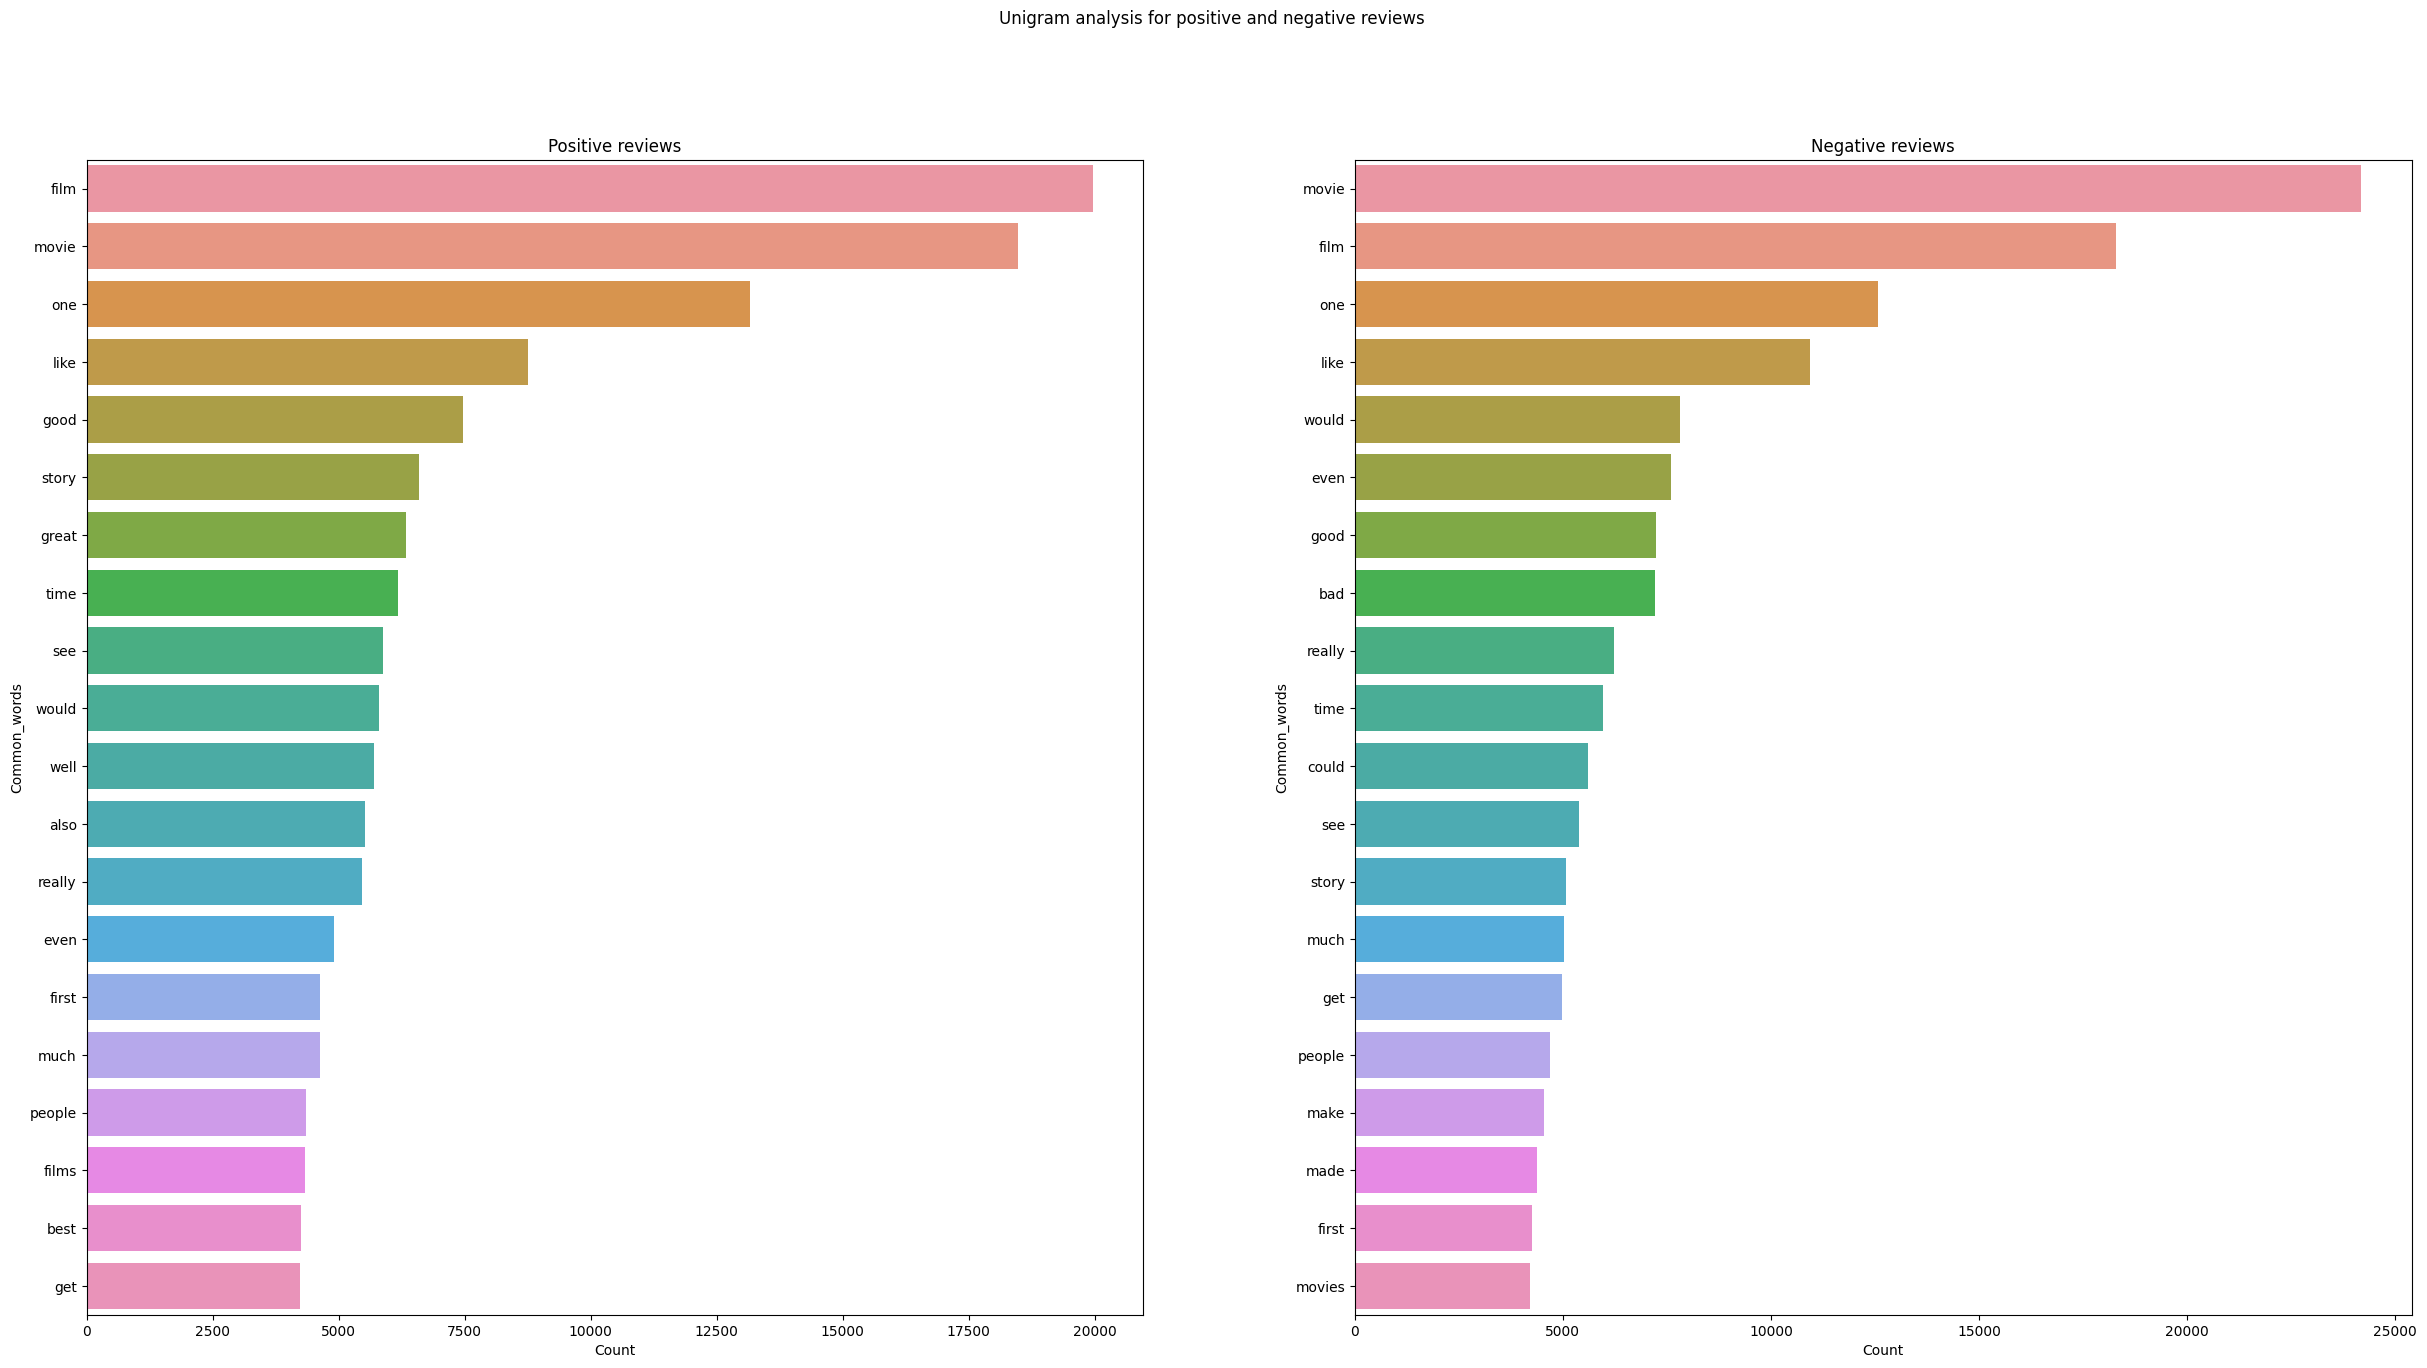

In [284]:
positive_data = train_df[train_df.label == 1]['no_sw']
negative_data = train_df[train_df.label == 0]['no_sw']
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(30,15))
uni_positive = get_ngrams(positive_data,20,1)
uni_positive = dict(uni_positive)
temp = pd.DataFrame(list(uni_positive.items()), columns = ["Common_words" , 'Count'])
sns.barplot(data = temp, x="Count", y="Common_words", orient='h',ax = ax1)
ax1.set_title('Positive reviews')
uni_negative = get_ngrams(negative_data,20,1)
uni_negative = dict(uni_negative)
temp = pd.DataFrame(list(uni_negative.items()), columns = ["Common_words" , 'Count'])
sns.barplot(data = temp, x="Count", y="Common_words", orient='h',ax = ax2)
ax2.set_title('Negative reviews')
fig.suptitle('Unigram analysis for positive and negative reviews')
plt.show()

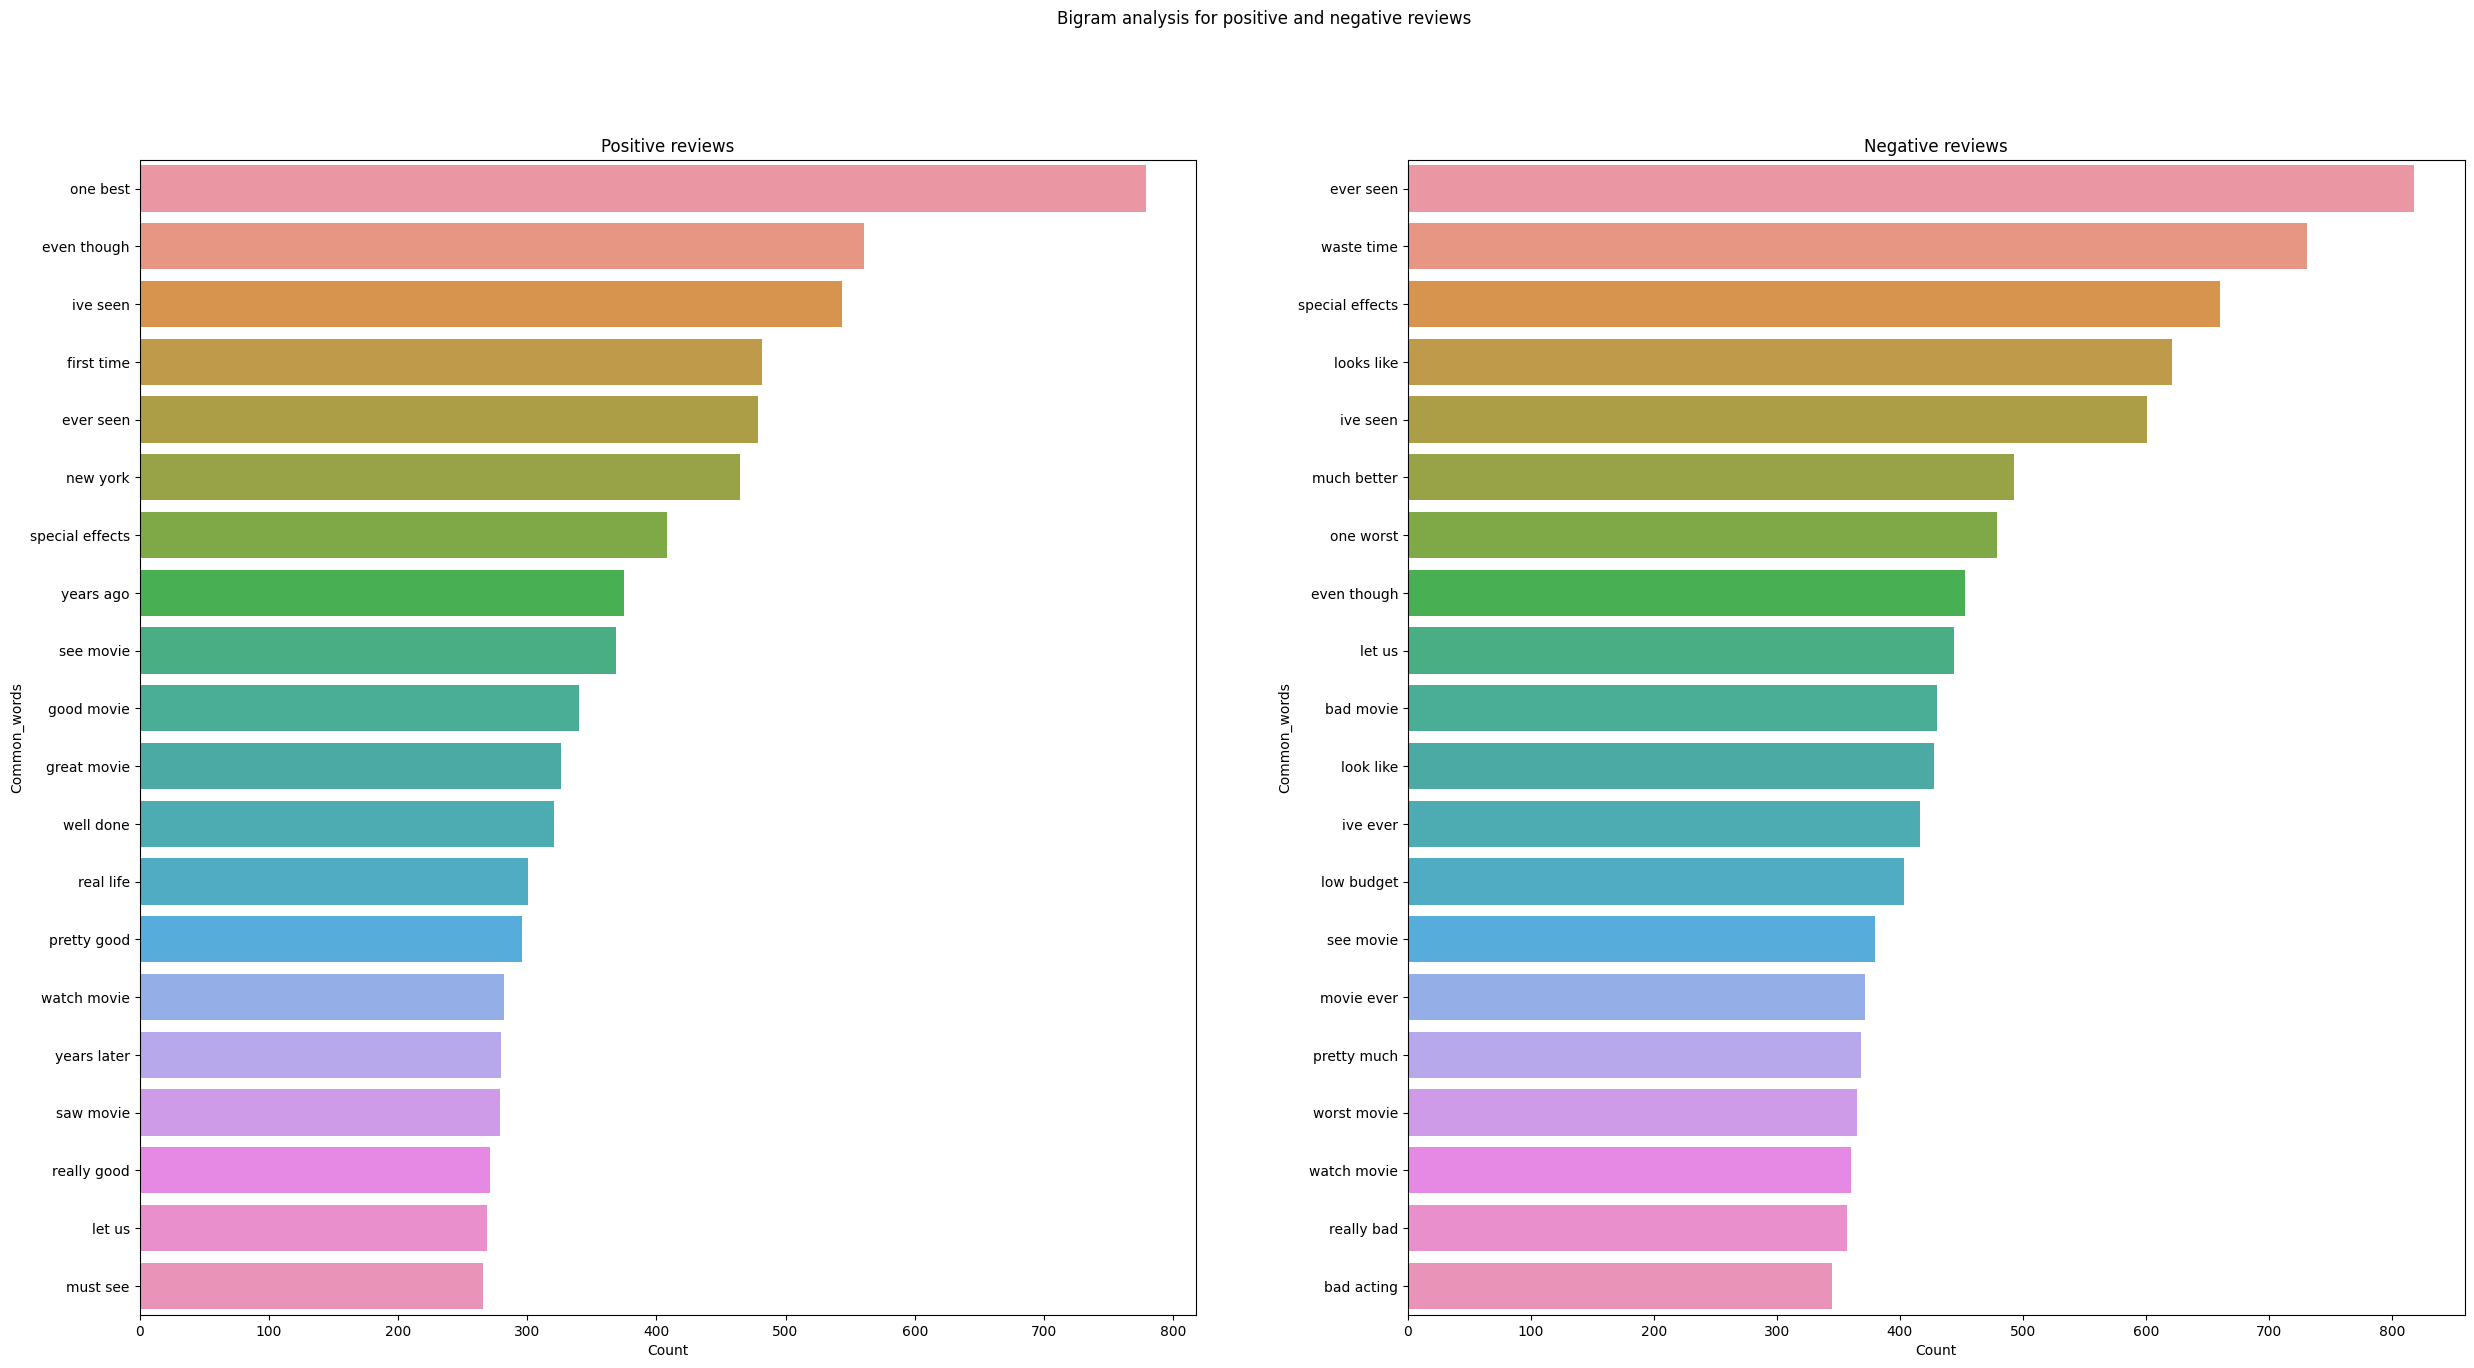

In [274]:
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(30,15))
bi_positive = get_ngrams(positive_data,20,2)
bi_positive = dict(bi_positive)
temp = pd.DataFrame(list(bi_positive.items()), columns = ["Common_words" , 'Count'])
sns.barplot(data = temp, x="Count", y="Common_words", orient='h',ax = ax1)
ax1.set_title('Positive reviews')
bi_negative = get_ngrams(negative_data,20,2)
bi_negative = dict(bi_negative)
temp = pd.DataFrame(list(bi_negative.items()), columns = ["Common_words" , 'Count'])
sns.barplot(data = temp, x="Count", y="Common_words", orient='h',ax = ax2)
ax2.set_title('Negative reviews')
fig.suptitle('Bigram analysis for positive and negative reviews')
plt.show()

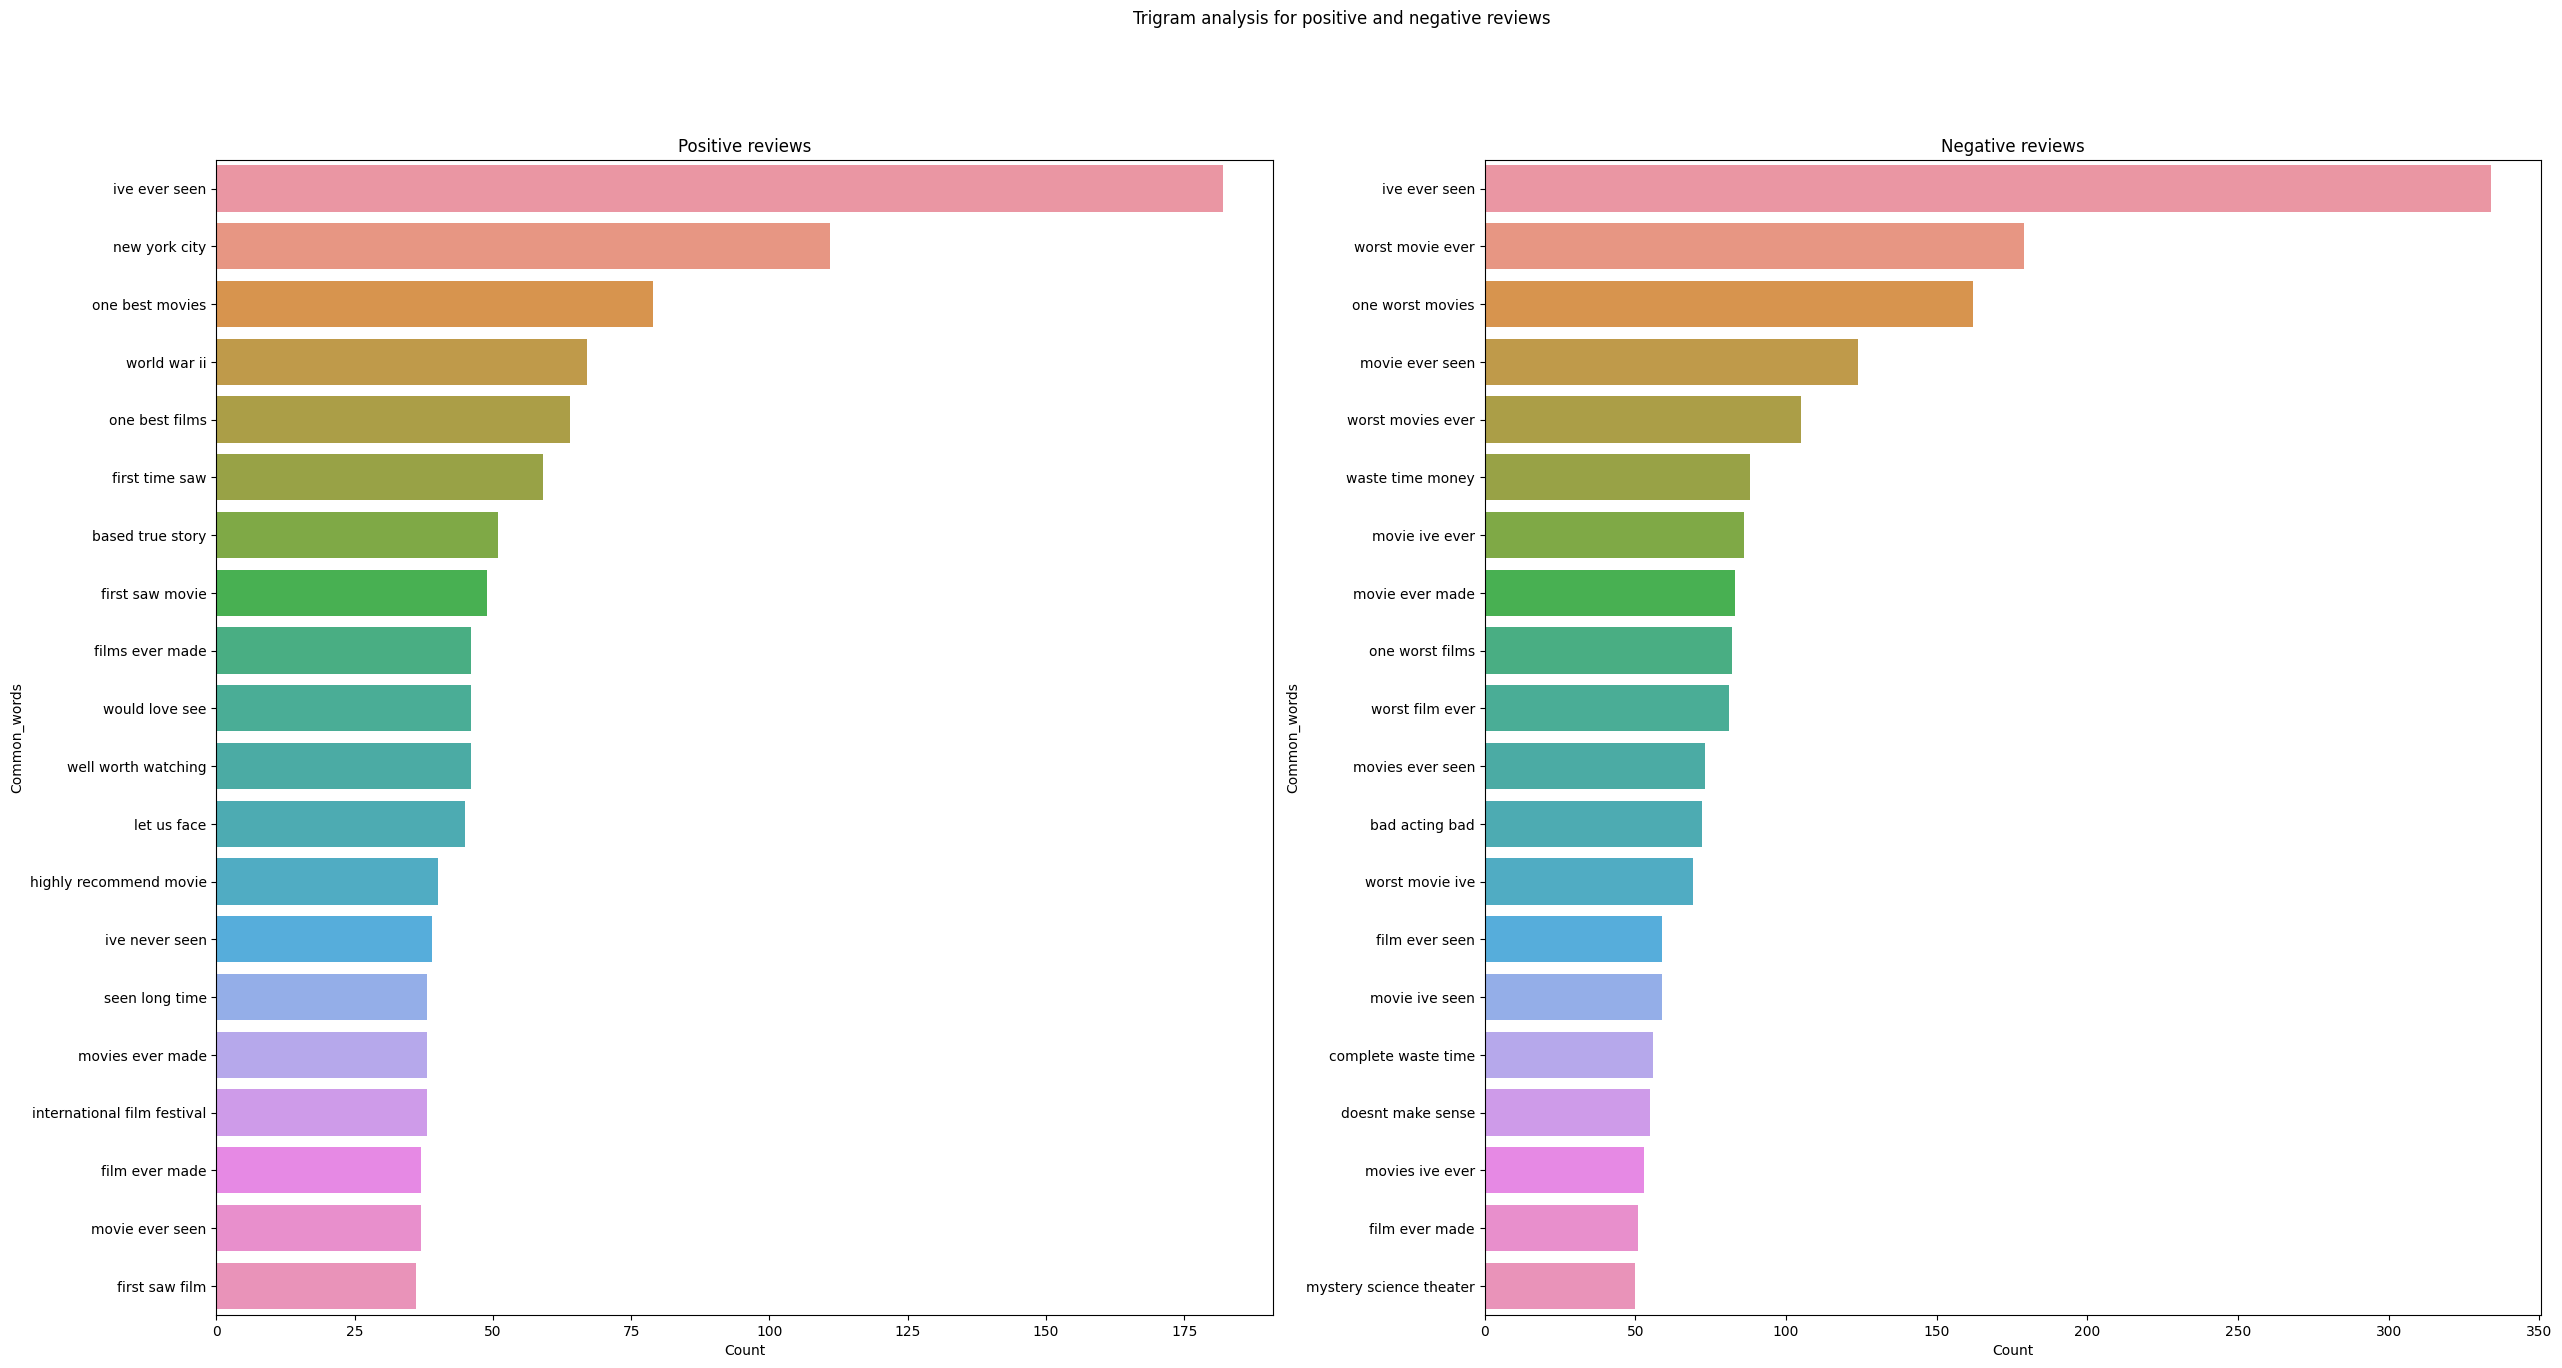

In [275]:
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(30,15))
tri_positive = get_ngrams(positive_data,20,3)
tri_positive = dict(tri_positive)
temp = pd.DataFrame(list(tri_positive.items()), columns = ["Common_words" , 'Count'])
sns.barplot(data = temp, x="Count", y="Common_words", orient='h',ax = ax1)
ax1.set_title('Positive reviews')
tri_negative = get_ngrams(negative_data,20,3)
tri_negative = dict(tri_negative)
temp = pd.DataFrame(list(tri_negative.items()), columns = ["Common_words" , 'Count'])
sns.barplot(data = temp, x="Count", y="Common_words", orient='h',ax = ax2)
ax2.set_title('Negative reviews')
fig.suptitle('Trigram analysis for positive and negative reviews')
plt.show()

In [285]:
X_train, X_test, y_train, y_test = train_test_split(train_df['wo_stopfreq_lem'], train_df['label'], test_size=0.2,random_state=0)

In [286]:
[i.shape for i in [X_train, X_test, y_train, y_test] ]

[(20000,), (5000,), (20000,), (5000,)]

In [370]:
word_vectorizer = TfidfVectorizer(
    sublinear_tf=True,
    strip_accents='unicode',
    analyzer='word',
    token_pattern=r'\w{1,}',
    stop_words='english',
    ngram_range=(1, 3),
    max_features=10000,
)

word_vectorizer.fit(train_df['wo_stopfreq_lem'])

tfidf_train = word_vectorizer.transform(X_train)
tfidf_test = word_vectorizer.transform(X_test)

In [353]:
print('Shape of tfidf_train:',tfidf_train.shape)
print('Shape of tfidf_test:',tfidf_test.shape)

Shape of tfidf_train: (20000, 10000)
Shape of tfidf_test: (5000, 10000)


In [354]:
cv=CountVectorizer(analyzer = 'word', token_pattern = r'\w{1,}',ngram_range=(1,3),max_features=10000)
cv.fit(train_df['wo_stopfreq_lem'])
cv_train=cv.transform(X_train)
cv_test=cv.transform(X_test)

In [355]:
print('Shape of cv_train:',cv_train.shape)
print('Shape of cv_test:',cv_test.shape)

Shape of cv_train: (20000, 10000)
Shape of cv_test: (5000, 10000)


In [356]:
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, roc_auc_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import roc_curve

In [302]:
def display_confusion_matrix_and_metrics(true_labels, predicted_labels):
    
    # Calculate confusion matrix
    conf_matrix = confusion_matrix(true_labels, predicted_labels)
    
    # Visualization of the confusion matrix using a heatmap
    plt.figure(figsize=(7, 5))
    sns.heatmap(conf_matrix, annot=True, fmt='g', cmap='Oranges',
                xticklabels=['Bad','Good'], 
                yticklabels=['Bad','Good'])
    plt.title(f'Accuracy: {accuracy_score(true_labels, predicted_labels):.4f}')
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.show()
    
    # Printing classification report for further insights
    print("\nClassification Report:")
    print(classification_report(true_labels, predicted_labels))

In [357]:

def plot_roc_auc_curve(true_labels, probabilities):
    
    # Calculate the ROC curve points
    false_positive_rate, true_positive_rate, _ = roc_curve(true_labels, probabilities)
    
    # Calculate the AUC score
    auc_score = roc_auc_score(true_labels, probabilities)
    
    # Plot the ROC curve
    plt.figure(figsize=(16, 9))
    plt.plot([0, 1], [0, 1], linestyle='--', label='Baseline (No Skill)')
    plt.plot(false_positive_rate, true_positive_rate, marker='.', label=f'Model (AUC = {auc_score:.3f})')
    
    # Configure plot aesthetics
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve and AUC Score')
    plt.legend()
    plt.show()

In [377]:


# Initialize and train the logistic regression model
MultinomialNaviveBayes_model = MultinomialNB(alpha=1.0)
MultinomialNaviveBayes_model.fit(tfidf_train, y_train)

# Predict on training and testing sets
train_predictions = MultinomialNaviveBayes_model.predict(tfidf_train)
test_predictions = MultinomialNaviveBayes_model.predict(tfidf_test)

# Calculate the accuracy on the test set
test_accuracy = accuracy_score(y_test, test_predictions)

In [378]:
# Output model performance metrics
print(f'Recall Score: {recall_score(y_train, train_predictions):.4f}')
print(f'Precision Score: {precision_score(y_train, train_predictions):.4f}')
print(f'F1 Score: {f1_score(y_train, train_predictions):.4f}')
print(f'Accuracy Score: {accuracy_score(y_train, train_predictions):.4f}')
print(f'AUC Score: {roc_auc_score(y_train, train_predictions):.4f}')

Recall Score: 0.8912
Precision Score: 0.8777
F1 Score: 0.8844
Accuracy Score: 0.8835
AUC Score: 0.8836


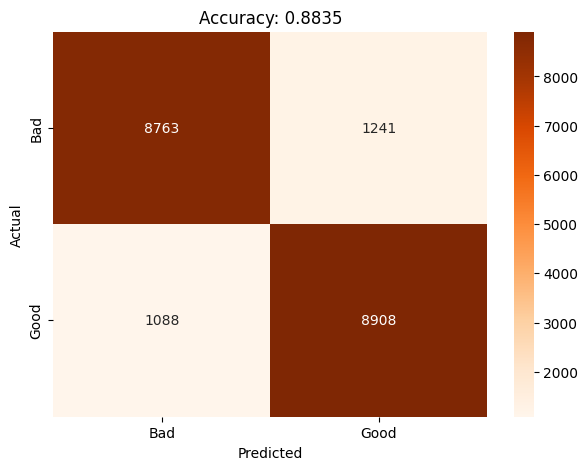


Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.88      0.88     10004
           1       0.88      0.89      0.88      9996

    accuracy                           0.88     20000
   macro avg       0.88      0.88      0.88     20000
weighted avg       0.88      0.88      0.88     20000



In [379]:
# Train Predictions
display_confusion_matrix_and_metrics(y_train, train_predictions)

In [380]:
# Test Data Performance Metrics
print(f'Recall Score: {recall_score(y_test, test_predictions):.4f}')
print(f'Precision Score: {precision_score(y_test, test_predictions):.4f}')
print(f'F1 Score: {f1_score(y_test, test_predictions):.4f}')
print(f'Accuracy Score: {accuracy_score(y_test, test_predictions):.4f}')
print(f'AUC Score: {roc_auc_score(y_test, test_predictions):.4f}')

Recall Score: 0.8790
Precision Score: 0.8608
F1 Score: 0.8698
Accuracy Score: 0.8682
AUC Score: 0.8682


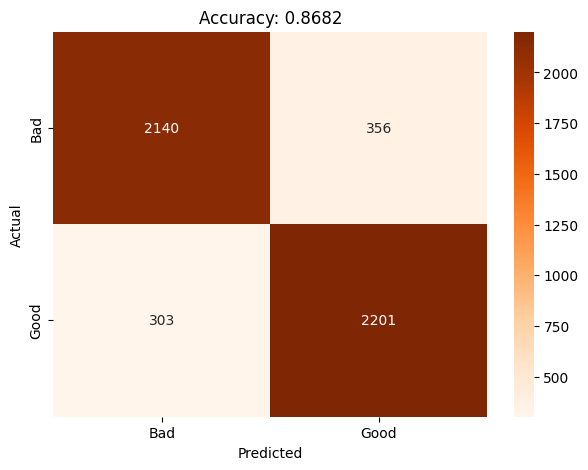


Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.86      0.87      2496
           1       0.86      0.88      0.87      2504

    accuracy                           0.87      5000
   macro avg       0.87      0.87      0.87      5000
weighted avg       0.87      0.87      0.87      5000



In [381]:
# Test Data Predictions
display_confusion_matrix_and_metrics(y_test, test_predictions)

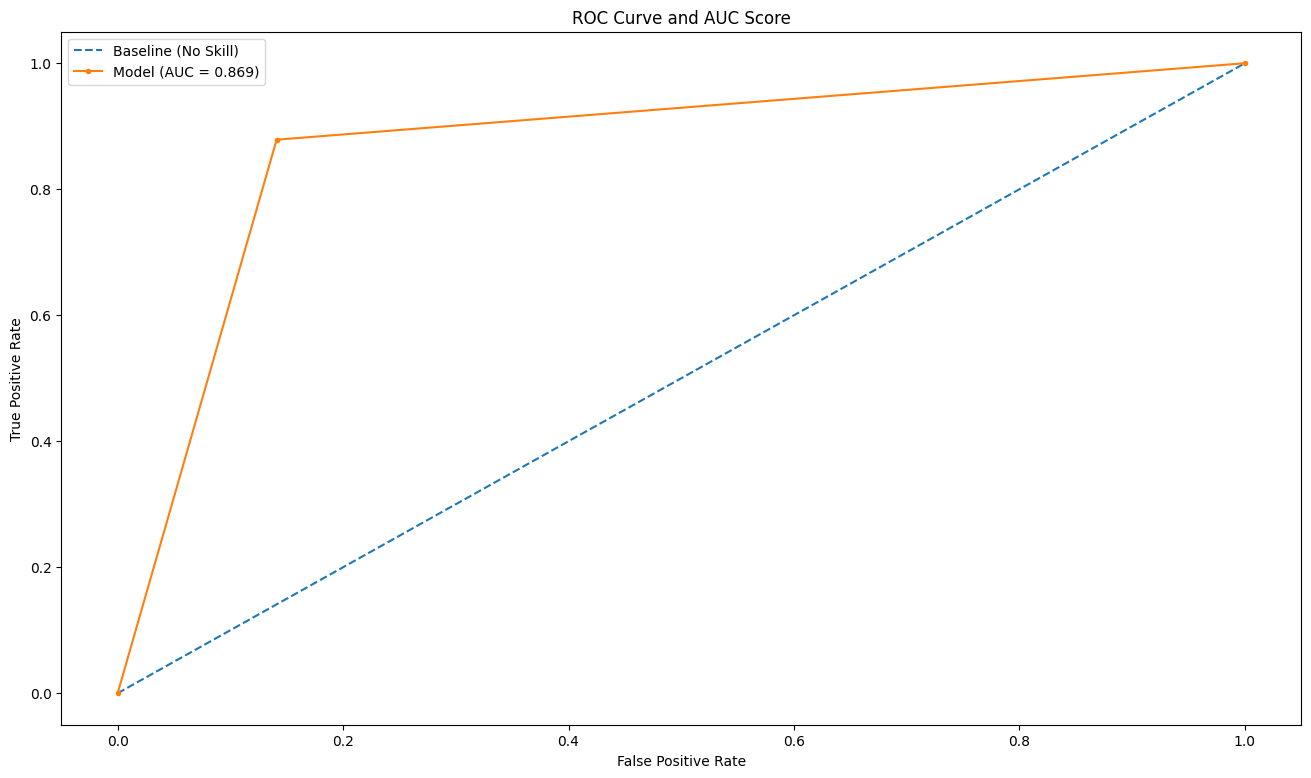

In [363]:
plot_roc_auc_curve(y_test, test_predictions)

In [382]:
from sklearn.naive_bayes import MultinomialNB, BernoulliNB
# Initialize and train the logistic regression model
BNaviveBayes_model = BernoulliNB(alpha=1.0)
BNaviveBayes_model.fit(tfidf_train, y_train)

# Predict on training and testing sets
train_predictions = BNaviveBayes_model.predict(tfidf_train)
test_predictions = BNaviveBayes_model.predict(tfidf_test)

# Calculate the accuracy on the test set
test_accuracy = accuracy_score(y_test, test_predictions)

In [383]:
# Output model performance metrics
print(f'Recall Score: {recall_score(y_train, train_predictions):.4f}')
print(f'Precision Score: {precision_score(y_train, train_predictions):.4f}')
print(f'F1 Score: {f1_score(y_train, train_predictions):.4f}')
print(f'Accuracy Score: {accuracy_score(y_train, train_predictions):.4f}')
print(f'AUC Score: {roc_auc_score(y_train, train_predictions):.4f}')

Recall Score: 0.8690
Precision Score: 0.8772
F1 Score: 0.8731
Accuracy Score: 0.8738
AUC Score: 0.8737


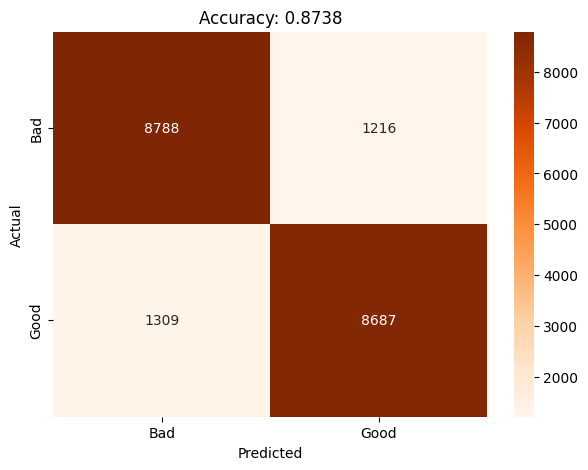


Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.88      0.87     10004
           1       0.88      0.87      0.87      9996

    accuracy                           0.87     20000
   macro avg       0.87      0.87      0.87     20000
weighted avg       0.87      0.87      0.87     20000



In [384]:
# Train Predictions
display_confusion_matrix_and_metrics(y_train, train_predictions)

In [385]:
# Test Data Performance Metrics
print(f'Recall Score: {recall_score(y_test, test_predictions):.4f}')
print(f'Precision Score: {precision_score(y_test, test_predictions):.4f}')
print(f'F1 Score: {f1_score(y_test, test_predictions):.4f}')
print(f'Accuracy Score: {accuracy_score(y_test, test_predictions):.4f}')
print(f'AUC Score: {roc_auc_score(y_test, test_predictions):.4f}')

Recall Score: 0.8582
Precision Score: 0.8593
F1 Score: 0.8587
Accuracy Score: 0.8586
AUC Score: 0.8586


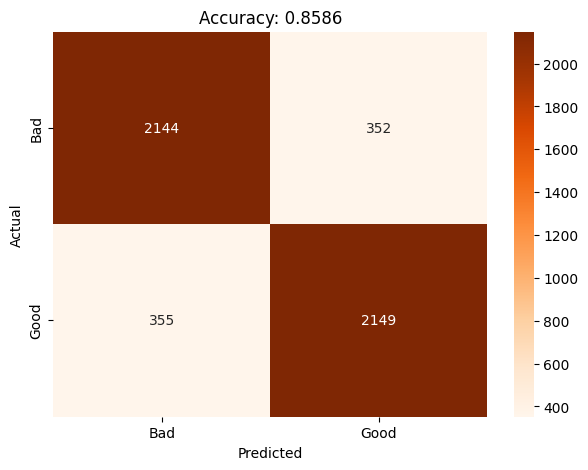


Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.86      0.86      2496
           1       0.86      0.86      0.86      2504

    accuracy                           0.86      5000
   macro avg       0.86      0.86      0.86      5000
weighted avg       0.86      0.86      0.86      5000



In [386]:
# Test Data Predictions
display_confusion_matrix_and_metrics(y_test, test_predictions)

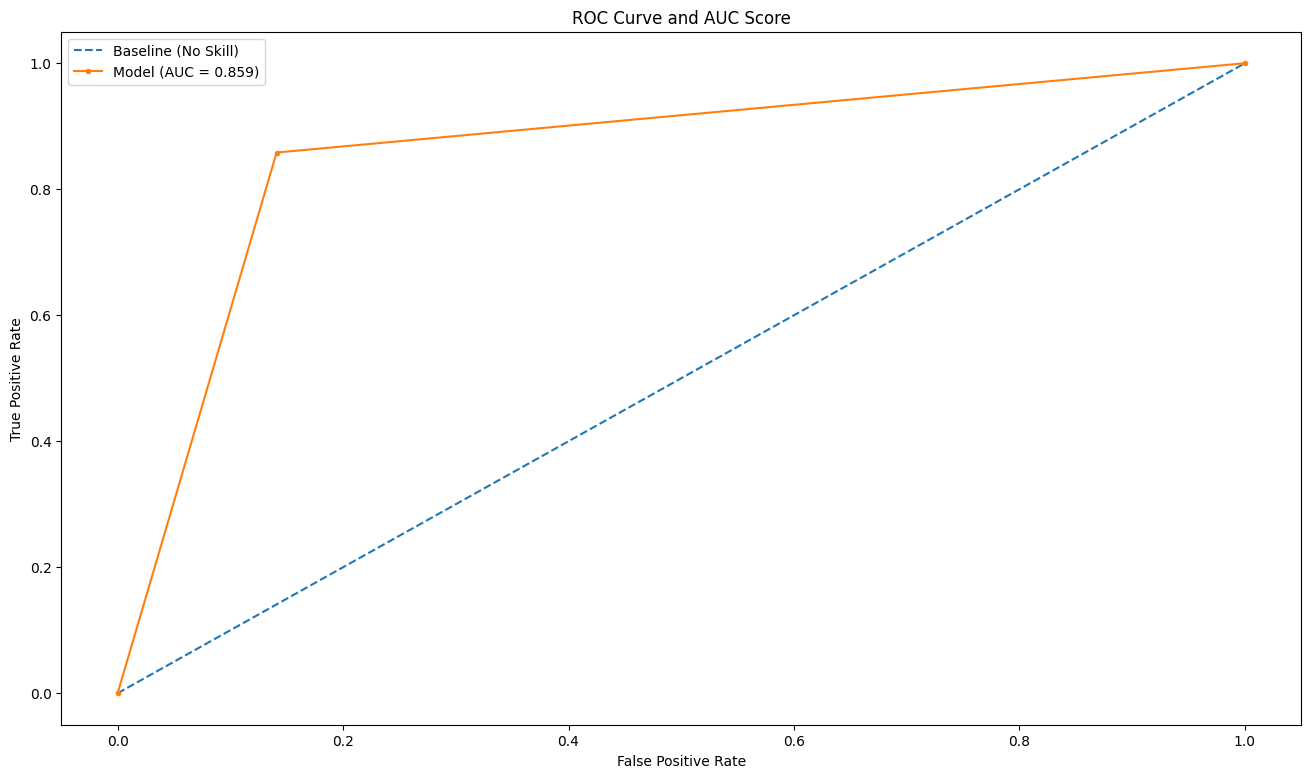

In [387]:
plot_roc_auc_curve(y_test, test_predictions)

In [324]:
! pip install lime


     ---------------------------------------- 0.0/275.7 kB ? eta -:--:--
     - -------------------------------------- 10.2/275.7 kB ? eta -:--:--
     --------------- ---------------------- 112.6/275.7 kB 1.3 MB/s eta 0:00:01
     -------------------------------------- 275.7/275.7 kB 2.8 MB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283846 sha256=8cb07f1428b1d686f62423a171860fb9ebeb71587f2f6889d1544bf33aac2137
  Stored in directory: c:\users\cragh\appdata\local\pip\cache\wheels\85\fa\a3\9c2d44c9f3cd77cf4e533b58900b2bf4487f2a17e8ec212a3d
Successfully built lime


In [388]:
from lime.lime_text import LimeTextExplainer


In [389]:
class_names = ['Bad', 'Good']  # Adjust based on your classification labels
explainer = LimeTextExplainer(class_names=class_names)


In [390]:
def predict_proba_func(texts):
    # Vectorize the texts
    text_features = word_vectorizer.transform(texts)
    # Return prediction probabilities
    return MultinomialNaviveBayes_model.predict_proba(text_features)


In [391]:
test_idx = 24999  # Index of the document in the test set
document_to_explain = test_df['review'].iloc[test_idx]  # 


In [392]:
exp = explainer.explain_instance(document_to_explain, predict_proba_func, num_features=10)
exp.show_in_notebook(text=True)
